# STAT 345: Nonparametric Statistics

## Lesson 02.2: The Binomial Test

**Reading: Conover Section 3.1**

*Prof. John T. Whelan*

Tuesday 28 January 2025

These lecture slides are in a computational notebook.  You have access to them through http://vmware.rit.edu/

Flat HTML and slideshow versions are also in MyCourses.

The notebook can run Python commands (other notebooks can use R or Julia; "Ju-Pyt-R").  Think: computational data analysis, not "coding".

Standard commands to activate inline interface and import libraries:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

# Tests for Binomial Proportion

- Wish to model **binomial experiment**: series of $n$ independent identically-distributed observations $\{{\color{royalblue}{X_i}}\}$, each w/two possible outcomes, labelled “success” (${\color{royalblue}{X_i}}=1$) and “failure” (${\color{royalblue}{X_i}}=0$).

- Each observation is a **Bernoulli trial**, w/probability distribution $P({\color{royalblue}{X_i}}{\mathbin{=}}1)=p$, $P({\color{royalblue}{X_i}}{\mathbin{=}}0)=1-p$.

- Sometimes called "sampling with replacement"; draw from a population w/proportion $p$ of successes & put each item back so proportion doesn't change.

- Compare "sampling without replacement" (in the limit of a large population, the two become equivalent)

- Binomial experiments often covered in basic stats, but also included in nonparametrics because  the model requires minimal assumptions.

- Test statistic ${\color{royalblue}{Y}}=\sum_{i=1}^n {\color{royalblue}{X_i}}$ (total number of successes) is a binomial random variable w/parameters $n$ (# of trials) and $p$ (prob of success on each trial).

- Probability mass function for ${\color{royalblue}{Y}}\sim\operatorname{Bin}(n,p)$ is
$$p(y) = \frac{n!}{(n-y)!y!} p^y (1-p)^{n-y} \qquad y = 0, 1, \ldots, n$$

- Binomial distribution has $E({\color{royalblue}{Y}})=np$ & $\operatorname{Var}({\color{royalblue}{Y}})=np(1-p)$

- For large $n$, Central Limit Theorem says
$${\color{royalblue}{Z}} = \frac{{\color{royalblue}{Y}}-np}{\sqrt{np(1-p)}}$$ is
approximately standard normal, which simplifies most of the
constructions.

## 1 Hypothesis Tests

There are three typical hypothesis tests for the proportion in a
binomial experiment, all based around a hypothesized null value $p^*$
for the parameter $p$:

- An **upper-tailed test** (one-tailed), where the null hypothesis is
$H_0$: $p=p^*$ (or $p\le p^*$) and the alternative hypothesis is $H_1$:
$p>p^*$.

- A **lower-tailed test** (one-tailed), where the null hypothesis is
$H_0$: $p=p^*$ (or $p\ge p^*$) and the alternative hypothesis is $H_1$:
$p<p^*$.

- A **two-tailed test**, where the null hypothesis is $H_0$: $p=p^*$ and
the alternative hypothesis is $H_1$: $p\ne p^*$.

### 1.1 Large Samples

For large $n$ (typically $np^*\gtrsim 10$ & $n(1-p^*)\gtrsim 10$), normal approximation says
$${\color{royalblue}{Z}} = \frac{{\color{royalblue}{Y}}-np^*}{\sqrt{np^*(1-p^*)}}$$
is standard normal if $H_0$ is true.

So if $H_1$ is $p>p^*$, to get a test w/significance $\alpha$, we reject $H_0$ if $z>z_{1-\alpha}$.

In [3]:
n = 50; pstar=0.75
print("For n=%d, pstar=%g, we have npstar=%g & n(1-pstar)=%g"%(n,pstar,n*pstar,n*(1-pstar)))

For n=50, pstar=0.75, we have npstar=37.5 & n(1-pstar)=12.5


In [4]:
muy = n*pstar; sigy = np.sqrt(n*pstar*(1-pstar)); muy, sigy

(37.5, 3.0618621784789726)

In [5]:
alpha = 0.05; zthresh=stats.norm.isf(alpha); ythresh = muy + zthresh*sigy 
print("For a test w/alpha=%g, we reject if z>%g, i.e., y>%g"%(alpha,zthresh,ythresh))

For a test w/alpha=0.05, we reject if z>1.64485, i.e., y>42.5363


In [6]:
print("For a test w/alpha=%g, we reject if z>%g, i.e., y>%g"%(alpha,zthresh,ythresh))

For a test w/alpha=0.05, we reject if z>1.64485, i.e., y>42.5363


BTW, exact significance of this test is a little less than $0.05$:

In [7]:
nulldist = stats.binom(n,pstar)
nulldist.mean(), nulldist.std(), muy, sigy

(37.5, 3.0618621784789726, 37.5, 3.0618621784789726)

In [8]:
print("Exact significance is %g" % nulldist.sf(ythresh))

Exact significance is 0.0452558


This is because $\color{royalblue}{Y}$ is a discrete rv, so $P(\color{royalblue}{Y}\mathbin{>}42.54)=P(\color{royalblue}{Y}\mathbin{>}42)=P(\color{royalblue}{Y}\mathbin{\ge}43)$:

In [9]:
nulldist.sf(42), nulldist.sf(43) + nulldist.pmf(43)

(0.04525584649016445, 0.045255846490164404)

In [10]:
print("P(Y>%d)=%g; P(Y>%d)=%g; P(Y>%d)=%g" % (41,nulldist.sf(41),42,nulldist.sf(42),43,nulldist.sf(43)))

P(Y>41)=0.0915973; P(Y>42)=0.0452558; P(Y>43)=0.0193909


If $H_1$ is $p<p^*$, use a lower-tailed test which rejects $H_0$ if ${\color{royalblue}{Z}}<z_{\alpha}=-z_{1-\alpha}$

In [11]:
zthreshlo=stats.norm.ppf(alpha); ythreshlo = muy + zthreshlo*sigy
print("For a test w/alpha=%g, we reject if z<%g, i.e., y<%g"%(alpha,zthreshlo,ythreshlo))
print("Exact significance is %g" % nulldist.cdf(ythreshlo))

For a test w/alpha=0.05, we reject if z<-1.64485, i.e., y<32.4637
Exact significance is 0.0551234


$P(\color{royalblue}{Y}\mathbin{<}32.46)=P(\color{royalblue}{Y}\mathbin{\le}32)=P(\color{royalblue}{Y}\mathbin{<}33)$:

In [12]:
nulldist.cdf(32), nulldist.cdf(33) - nulldist.pmf(33)

(0.055123360333705934, 0.05512336033370603)

In [13]:
print("P(Y<%d)=%g; P(Y<%d)=%g; P(Y<%d)=%g" % (32,nulldist.cdf(32-0.5),33,nulldist.cdf(33-0.5),34,nulldist.cdf(34-0.5)))

P(Y<32)=0.0287332; P(Y<33)=0.0551234; P(Y<34)=0.0983073


Note that `cdf()` returns $P(\color{royalblue}{Y}\mathbin{\le}y)$ but `sf()` returns $P(\color{royalblue}{Y}\mathbin{>}y)$

If $H_1$ is $p\ne p^*$, use a two-tailed test which rejects $H_0$ if ${\color{royalblue}{Z}}<z_{\alpha/2}$ **or** $\color{royalblue}{Z}>z_{1-\alpha/2}$:

In [14]:
zthresh2lo=stats.norm.ppf(0.5*alpha); zthresh2hi=stats.norm.isf(0.5*alpha)
ythresh2lo = muy + zthresh2lo*sigy; ythresh2hi = muy + zthresh2hi*sigy
print("For a test w/alpha=%g, we reject if z<%g or z>%g, i.e., y<%g or y>%g"
      %(alpha,zthresh2lo,zthresh2hi,ythresh2lo,ythresh2hi))
print("Exact significance is %g + %g = %g"
      % (nulldist.cdf(ythresh2lo),nulldist.sf(ythresh2hi),nulldist.cdf(ythresh2lo)+nulldist.sf(ythresh2hi)))

For a test w/alpha=0.05, we reject if z<-1.95996 or z>1.95996, i.e., y<31.4989 or y>43.5011
Exact significance is 0.0287332 + 0.0193909 = 0.048124


Note the distinction between $P(\color{royalblue}{Y}\mathbin{\le}y)$ and $P(\color{royalblue}{Y}\mathbin{<}y)$ only matters if $y$ is an integer

- Can also use normal approx for a $p$-value, but one subtle point bc of discreteness.

- E.g., for upper-tailed test ($H_1$: $p>p^*$), would like to compute $P({\color{royalblue}{Z}}{\mathbin{\ge}}z|p{\mathbin{=}}p^*)$ from the actual observed value $z=\frac{y-np^*}{\sqrt{np^*(1-p^*)}}$

- What we really want is $P({\color{royalblue}{Y}}{\mathbin{\ge}}y)$, and $P({\color{royalblue}{Z}}{\mathbin{\ge}}z)$ is an approximation.

- But $P({\color{royalblue}{Z}}{\mathbin{\ge}}z)=P({\color{royalblue}{Z}}{\mathbin{>}}z)$ while $P({\color{royalblue}{Y}}{\mathbin{\ge}}y)\ne P({\color{royalblue}{Y}}{\mathbin{>}}y)$ (since $y\in\mathbb{Z}$)

- OTOH, $P({\color{royalblue}{Y}}{\mathbin{\ge}}y)=P({\color{royalblue}{Y}}{\mathbin{\ge}}y-0.5)=P({\color{royalblue}{Y}}{\mathbin{>}}y-0.5)=P({\color{royalblue}{Y}}{\mathbin{>}}y-1)$

- Best approximation to $P({\color{royalblue}{Y}}{\mathbin{\ge}}y)=P({\color{royalblue}{Y}}{\mathbin{\ge}}y-0.5)$ is $P\left({\color{royalblue}{Z}}{\mathbin{\ge}}\frac{y-0.5-np^*}{\sqrt{np^*(1-p^*)}}\right)$<br>This is known as the **continuity correction**

For example, if we have $n=50$ and $p^{*}=0.75$ as before, and we actually observe $y=43$ successes, the naïve $p$-value without the continuity correction is:

In [15]:
y = 43; z=(y-muy)/sigy; print('P(Z>(%g-%g)/%g)=P(Z>%g)=%g'%(y,muy,sigy,z,stats.norm.sf(z)))

P(Z>(43-37.5)/3.06186)=P(Z>1.79629)=0.036224


On the other hand, if we use the continuity correction, we get:

In [16]:
zcorr=(y-0.5-muy)/sigy; print('P(Z>(%g-0.5-%g)/%g)=P(Z>%g)=%g'%(y,muy,sigy,zcorr,stats.norm.sf(zcorr)))

P(Z>(43-0.5-37.5)/3.06186)=P(Z>1.63299)=0.0512352


This is closer to the exact value:

In [17]:
print('P(Y>=%g)=%g'%(y,nulldist.sf(y-0.5)))

P(Y>=43)=0.0452558


Note we computed $P({\color{royalblue}{Y}}{\mathbin{>}}42.5)=P({\color{royalblue}{Y}}{\mathbin{\ge}}43)$ so we don't have to do something like $P({\color{royalblue}{Y}}{\mathbin{>}}43)+P({\color{royalblue}{Y}}{\mathbin{=}}43)$:

In [18]:
print('P(Y>%g)+P(Y=%g)=%g+%g=%g'%(y,y,nulldist.sf(y),nulldist.pmf(y),nulldist.sf(y)+nulldist.pmf(y)))

P(Y>43)+P(Y=43)=0.0193909+0.025865=0.0452558


Similarly, for $H_1$: $p<p^{*}$, the lower-tailed $p$-value is 
$P({\color{royalblue}{Y}}{\mathbin{\le}}y)\approx P\left({\color{royalblue}{Z}}{\mathbin{\le}}\frac{y+0.5-np^*}{\sqrt{np^*(1-p^*)}}\right)$

In [19]:
print('P(Z<(%g-%g)/%g)=P(Z<%g)=%g'%(y,muy,sigy,z,stats.norm.cdf(z)))
zcorrlo=(y+0.5-muy)/sigy; print('P(Z<(%g+0.5-%g)/%g)=P(Z<%g)=%g'%(y,muy,sigy,zcorrlo,stats.norm.cdf(zcorrlo)))
print('P(Y<=%g)=%g'%(y,nulldist.cdf(y)))

P(Z<(43-37.5)/3.06186)=P(Z<1.79629)=0.963776
P(Z<(43+0.5-37.5)/3.06186)=P(Z<1.95959)=0.974978
P(Y<=43)=0.980609


Of course, for computing $p$-values, if you have the exact distribution available, you might as well use that and not bother with the normal approximation!

### 1.2 General One-Tailed

If the sample size is not large enough to use the normal approximation,
we just need to use an appropriate threshold on the number of successes.
For instance, if we define a test which rejects $H_0$: $p=p^*$ in favor
of $H_1$: $p>p^*$ whenever $y>k$, this test will have significance
$$\alpha = P({\color{royalblue}{Y}}{\mathbin{>}}k|p{\mathbin{=}}p^*) = 1 - P({\color{royalblue}{Y}}{\mathbin{\le}}k|p{\mathbin{=}}p^*)
  = 1 - B(k;n,p^*)$$ where $B(y;n,p)$ is the cdf of the binomial
distribution. Conover tabulates this in Appendix Table A3, but we could
also get it from `scipy.stats.binom.cdf()` or equivalently
$1 - B(k;n,p^*)$ from `scipy.stats.binom.sf()`:

In [20]:
n = 20
pstar = 0.2
mydist = stats.binom(n,pstar)    
mydist.sf(10)

0.0005634136976601912

So a test which rejects $H_0:p=0.2$ when more than 10 out of 20 trials are successes will have a significance of $\alpha=0.00056$.

Can see the full set of $\alpha$ values for all possible upper-tailed tests by making an array of thresholds:

In [21]:
k_k = np.arange(n+1)
k_k,mydist.sf(k_k)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 array([9.88470785e-01, 9.30824710e-01, 7.93915281e-01, 5.88551138e-01,
        3.70351736e-01, 1.95792215e-01, 8.66925136e-02, 3.21426631e-02,
        9.98178632e-03, 2.59482740e-03, 5.63413698e-04, 1.01728765e-04,
        1.51628403e-05, 1.84500572e-06, 1.80276397e-07, 1.38034649e-08,
        7.97767107e-10, 3.27260570e-11, 8.49346560e-13, 1.04857600e-14,
        0.00000000e+00]))

In [22]:
for k in range(n+1):
    print('Significance of a test which rejects H0:p=%g if more than %d out of %d trials are successes is %g'
         % (pstar,k,n,stats.binom(n,pstar).sf(k))
         )

Significance of a test which rejects H0:p=0.2 if more than 0 out of 20 trials are successes is 0.988471
Significance of a test which rejects H0:p=0.2 if more than 1 out of 20 trials are successes is 0.930825
Significance of a test which rejects H0:p=0.2 if more than 2 out of 20 trials are successes is 0.793915
Significance of a test which rejects H0:p=0.2 if more than 3 out of 20 trials are successes is 0.588551
Significance of a test which rejects H0:p=0.2 if more than 4 out of 20 trials are successes is 0.370352
Significance of a test which rejects H0:p=0.2 if more than 5 out of 20 trials are successes is 0.195792
Significance of a test which rejects H0:p=0.2 if more than 6 out of 20 trials are successes is 0.0866925
Significance of a test which rejects H0:p=0.2 if more than 7 out of 20 trials are successes is 0.0321427
Significance of a test which rejects H0:p=0.2 if more than 8 out of 20 trials are successes is 0.00998179
Significance of a test which rejects H0:p=0.2 if more than 9

In [23]:
mydist.sf(6), mydist.sf(7)

(0.08669251356740035, 0.03214266308087516)

Note that this means it’s not possible to get a test with an arbitrary
significance $\alpha$. For instance, if $n=20$ and $p^*=0.2$, a test
which rejects $H_0$ if $y>7$ has $\alpha\approx 0.032$ and one which
rejects $H_0$ if $y>6$ has $\alpha\approx 0.087$, so we cannot find a
test with a significance of exactly $0.05$.

For the $p$-value of an upper one-sided hypothesis test, we just take
$$p = P({\color{royalblue}{Y}}{\mathbin{\ge}}y|p{\mathbin{=}}p^*) = 1 - B(y-1;n,p^*)$$

In [24]:
k = 8
print('If %d out of %d trials are successes, the p-value for an upper-tailed test of H0:p=%g is %g' %
     (k,n,pstar,stats.binom(n,pstar).sf(k-1)))

If 8 out of 20 trials are successes, the p-value for an upper-tailed test of H0:p=0.2 is 0.0321427


Again, only certain specific $p$-values are possible.

### 1.3 General Two-Tailed

Things get interesting for two-tailed tests. Not only do we have the
discreteness of the binomial distribution, but it's also in general
asymmetric, which means we have to give some thought to how much
probability to put on each tail of the distribution. E.g.,
suppose $n=20$ and $p^*=0.2$. Then the pmf is:

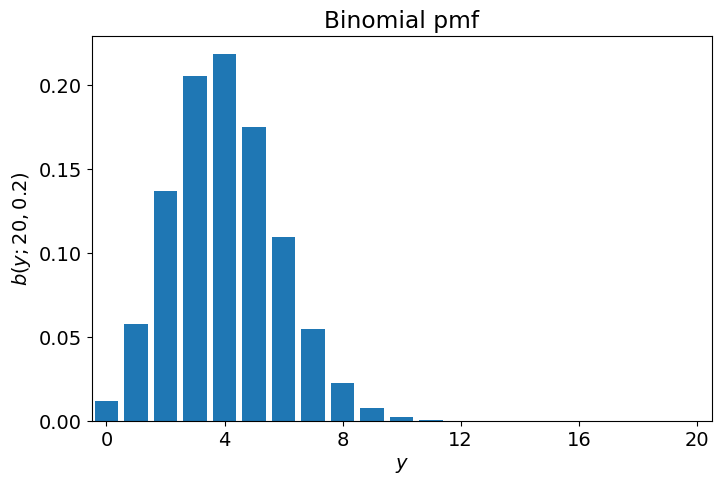

In [25]:
plt.bar(k_k,mydist.pmf(k_k),align='center');
plt.xlim(-0.5,n+0.5);plt.xticks(np.arange(0,21,4));plt.xlabel(r'$y$');plt.ylabel(r'$b(y;%d,%.1f)$'%(n,pstar));plt.title('Binomial pmf');plt.grid();

Conover somewhat unhelpfully tells us that if we want to devise a test
with confidence $\alpha$, we should reject if $y\le t_1$ or $y>t_2$
where
$P({\color{royalblue}{Y}}{\mathbin{\le}}t_1|p{\mathbin{=}}p^*)=\alpha_1$ and
$P({\color{royalblue}{Y}}{\mathbin{>}}t_2|p{\mathbin{=}}p^*)=\alpha_2$, where
$\alpha_1$ and $\alpha_2$ are each “approximately half” of $\alpha$, and
then doesn’t provide a small-$n$ example. Let’s work through the
details.

First, consider the problem of finding the two-tailed $p$-value when
$y=8$. We can find that
$P({\color{royalblue}{Y}}{\mathbin{\ge}}8)=P({\color{royalblue}{Y}}{\mathbin{>}}7.5)\approx
0.0321$ with

In [26]:
mydist.sf(8-1), mydist.sf(7.5)

(0.03214266308087516, 0.03214266308087516)

You might naïvely think that the two-tailed $p$-value should be twice
this, but we’re asking for the null probability of ${\color{royalblue}{Y}}$
having a value at least as extreme as $8$, which we can reasonably take
to mean a value which is no more likely than $8$, i.e.,
$\sum_{y:\ p(y)\le p(8)} p(y)$

To compute the $p$-value $\sum_{y:\ p(y)\le p(8)} p(y)$, we can make an array which tells us whether a number of successes is at least as unlikely as 8:

In [27]:
pmf_k = mydist.pmf(k_k)
unlikely_k = (pmf_k <= pmf_k[8])
print(unlikely_k)

[ True False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True]


and when we use this boolean array as an index to the array `k_k` it picks out the values for which `unlikely_k` is true:

In [28]:
k_k[unlikely_k]

array([ 0,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

So we see that the set of values at least as unlikely than 8 is
${\color{royalblue}{Y}}\le 0$ or ${\color{royalblue}{Y}}\ge 8$.

The set of values at least as unlikely than 8 is
${\color{royalblue}{Y}}\le 0$ or ${\color{royalblue}{Y}}\ge 8$.  But because
$P({\color{royalblue}{Y}}\le 0) =
0.0116$, the $P$-value is $0.0437$, which is less than twice the upper
tail probability.

In [29]:
pmf_k[0], pmf_k[unlikely_k].sum()

(0.01152921504606848, 0.04367187812694362)

Fortunately, this behavior is exactly what’s coded in
Python (or in R as `binom.test(8,20,0.2)`).

In [30]:
stats.binomtest(8,n,pstar)

BinomTestResult(k=8, n=20, alternative='two-sided', statistic=0.4, pvalue=0.04367187812694362)

To get a test with significance approximately $0.05$, we just need to
look at the possible $p$-values. First we sort the possible numbers of
successes in decreasing order of null probability:

In [31]:
np.argsort(mydist.pmf(k_k))[::-1]

array([ 4,  3,  5,  2,  6,  1,  7,  8,  0,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

The next least probable value after 8 is 7:

In [32]:
unlikely7_k = pmf_k <= pmf_k[7]; k_k[unlikely7_k]

array([ 0,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [33]:
pmf_k[unlikely7_k].sum()

0.09822172861346881

The $p$-value for $y=7$ is $0.0982$. So for a test which rejects if
${\color{royalblue}{Y}}\le 0$ or ${\color{royalblue}{Y}}\ge 8$, the significance
is $0.0437$; for one which rejects if ${\color{royalblue}{Y}}\le 0$ or
${\color{royalblue}{Y}}\ge 7$, it is $0.0982$.

## 2 Confidence Intervals

- Rather than testing for a specified proportion $p^*$, can use observed # of successes $y$ to construct a confidence interval on $p$.

- CI at confidence level $1-\alpha$ should have a probability of $1-\alpha$ of containing true value of $p$.

- Estimator ${\color{royalblue}{\hat{p}}}={\color{royalblue}{Y}}/n$ produces point estimate $\hat{p}=y/n$.  Central limit theorem gives approximately standard normal statistic
$\frac{{\color{royalblue}{\hat{p}}}-p}{\sqrt{p(1-p)/n}}$. Solving
$$
z_{\alpha/2}<\frac{\hat{p}-p}{\sqrt{p(1-p)/n}}<z_{1-\alpha/2}
$$
for $p$ gives a quadratic equation whose solution is the *Wilson score interval* seen in Devore.

- If $n$ is large enough, you can assume $\frac{{\color{royalblue}{\hat{p}}}-p}{\sqrt{{\color{royalblue}{\hat{p}}}(1-{\color{royalblue}{\hat{p}}})/n}}\sim N(0,1)$ and get approximate confidence interval w/endpoints
$$\hat{p} \pm z_{1-\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

- What if $n$ is not large?  Conover says look it up in the back of the book.

- In fact there are several different ways of defining intermediate-$n$ confidence intervals for binomial proportion (more information than you could possibly want at [Wikipedia](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval))

- Conover uses the Clopper-Pearson interval, defined as the set of all proportions
$p^*$ such that
$$P({\color{royalblue}{Y}}{\mathbin{\le}}y|p{\mathbin{=}}p^*) > \frac{\alpha}{2}
  \qquad\hbox{and}\qquad
  P({\color{royalblue}{Y}}{\mathbin{\ge}}y|p{\mathbin{=}}p^*) > \frac{\alpha}{2}$$
you could work this out experimentally, but the answer can be computed in closed form

In [34]:
def ClopperPearsonCI(CL,n,x):
    tailprob = 0.5*(1.-CL)
    lower = stats.beta.ppf(tailprob,x,n-x+1)
    upper = stats.beta.isf(tailprob,x+1,n-x)
    return (lower,upper)

We can then test it with

In [35]:
CL=.95; n=20; y=8
CIlo, CIhi = ClopperPearsonCI(CL,n,y)
print("Given %d successes in %d trials, the %g%% CI on p is %g to %g"%(y,n,100*CL,CIlo,CIhi))
print("P(Y<=%d|p=%g)=%g and P(Y>=%d|p=%g)=%g"
      %(y,CIhi,stats.binom(n,CIhi).cdf(y+0.5),y,CIlo,stats.binom(n,CIlo).sf(y-0.5)))

Given 8 successes in 20 trials, the 95% CI on p is 0.19119 to 0.639457
P(Y<=8|p=0.639457)=0.025 and P(Y>=8|p=0.19119)=0.025


In fact, this is now implemented in SciPy as well:

In [36]:
stats.binomtest(y,n).proportion_ci(CL)

ConfidenceInterval(low=0.19119006072557054, high=0.6394574126927552)

You will check on the homework that this construction gives the correct coverage.  I.e., for a given $p$ and $n$, some values of $y$ will give confidence intervals containing $p$ and some will not.  You can compute the probability that $\color{royalblue}{Y}\sim\operatorname{Bin}(n,p)$ takes on a value which gives a confidence interval containing $p$.  That probability should equal the confidence level.

- Note that our confidence interval construction is a little different than what we did for $p$-values, since we required equal tail probabilities when constructing the confidence interval.

- An interesting
exercise/challenge is to define a confidence interval, given $n$ and
$y$, as all of the proportions for which the $p$-value is greater than
$0.05$. You can then check the coverage of this confidence interval for
some true proportion $p$.